In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
pd.set_option('display.max_rows', 1000)
os.chdir('/Users/alexchandler/kr-calc/csv_files') #change to python script directory
knot_info = pd.read_csv('Knotinfo_data.csv', dtype='object')  

import sklearn
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
import itertools


# import required module for iterating through directory
import os
import json
# assign directory
os.chdir('/Users/alexchandler/kr-calc') #change to python script directory
directory = 'data'
#we create a dictionary with keys: names of knots
                          #values: dictionaries (keys: nonzero gradings, values: homology dimensions)
homfly_data={}
# sort directory and then iterate over files in that directory, creating a dictionary for easier use
listing = os.listdir(directory)
listing.sort()
for filename in listing:
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f) as json_file:
            data = json.load(json_file)
            data_dict = {}
            for i in range(int(len(data)/2)):
                data_dict[tuple(data[2*i])]=data[2*i+1]
            homfly_data[filename[:-5]]=data_dict
            
#import functions from functions.py (contains all functions being called in this notebook)
os.chdir('/Users/alexchandler/kr-calc/python_scripts') #change to python script directory
from functions import *

In [25]:
#creates two groups: planar and nonplanar
planar_knots = [knot for knot in list(homfly_data.keys()) if planar_support_alt(homfly_data[knot])==1]
non_planar_knots = [knot for knot in list(homfly_data.keys()) if planar_support_alt(homfly_data[knot])>1]

Checking that max $a$ degree minus 4 for larger $\Delta$ value is at least min $a$ degree for smaller $\Delta$.

In [39]:
for knot in non_planar_knots:
    deltas = list(set([g[0]+g[1]+g[2] for g in homfly_data[knot].keys()]))
    deltas.sort()
    deltas
    lhs = max([g[1]-4 for g in homfly_data[knot] if g[0]+g[1]+g[2]==deltas[1]])
    rhs = min([g[1] for g in homfly_data[knot] if g[0]+g[1]+g[2]==deltas[0]])
    if lhs>=rhs:
        print(knot)

10_128
10_136
11n_104
11n_12
11n_126
11n_133
11n_145
11n_155
11n_16
11n_20
11n_39
11n_45
11n_57
11n_61
11n_64
11n_79
11n_9


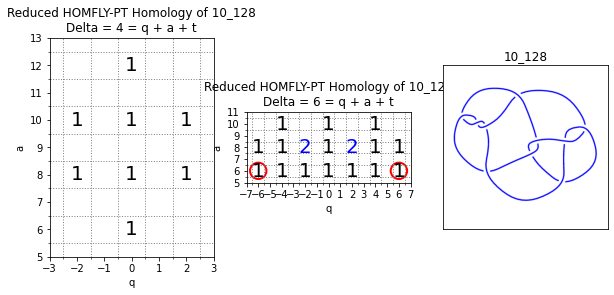

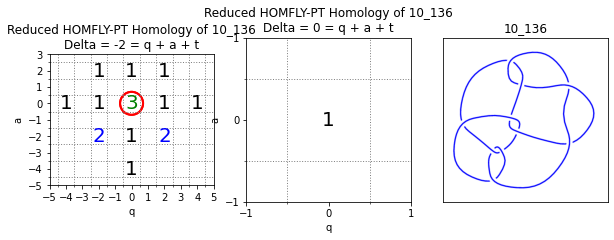

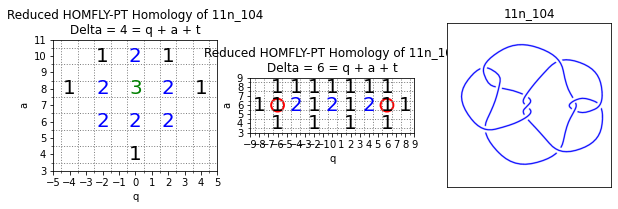

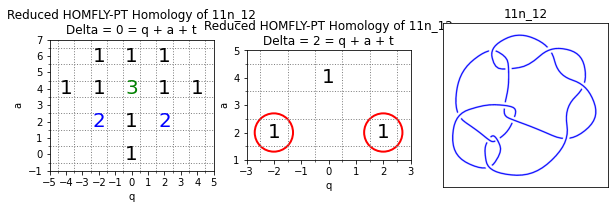

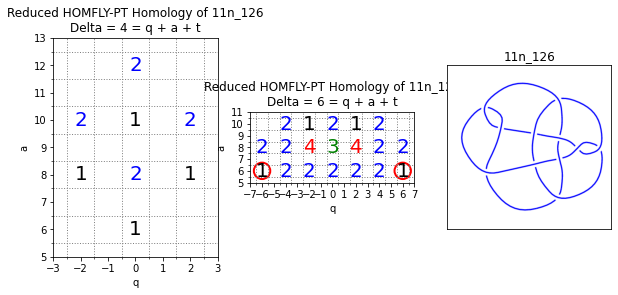

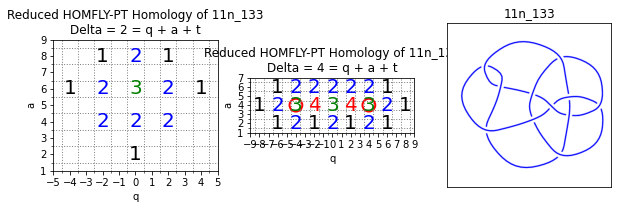

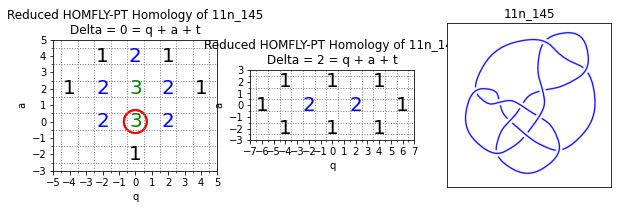

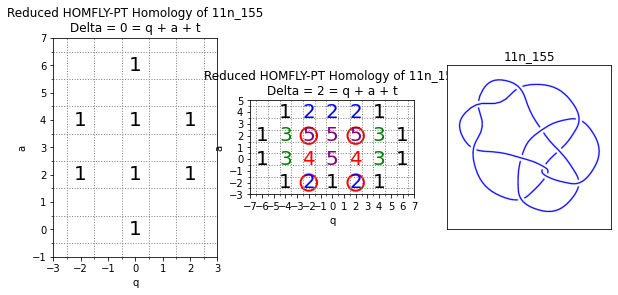

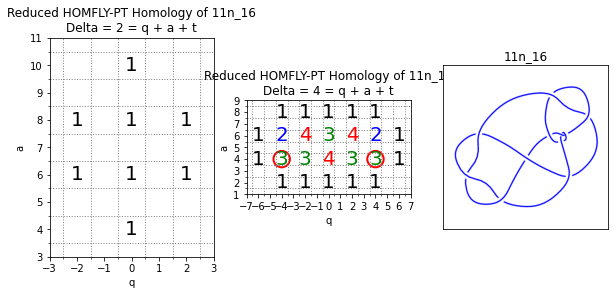

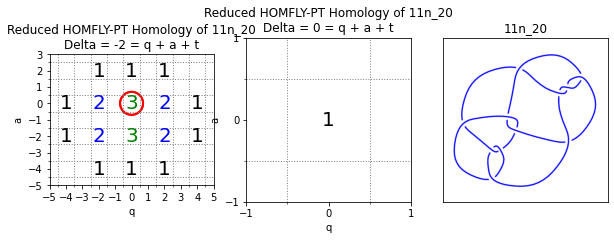

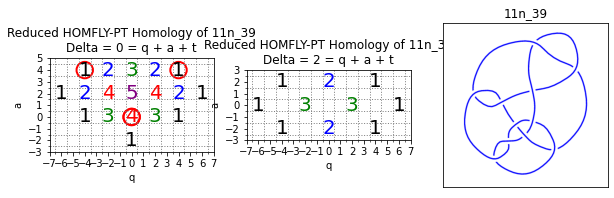

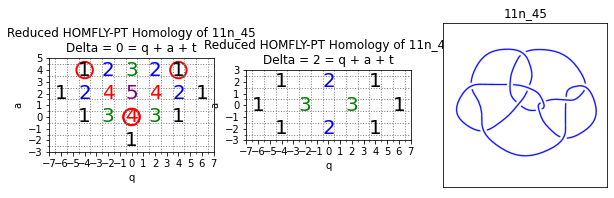

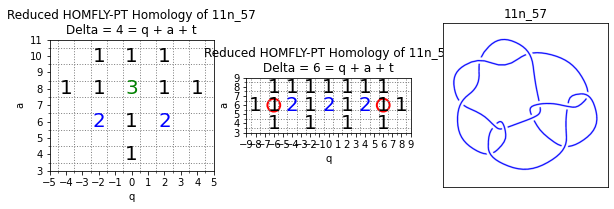

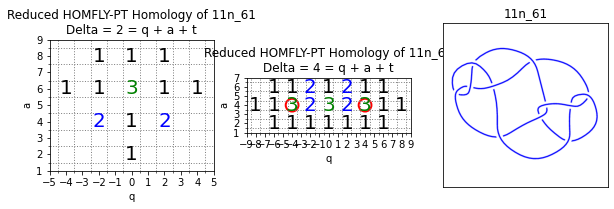

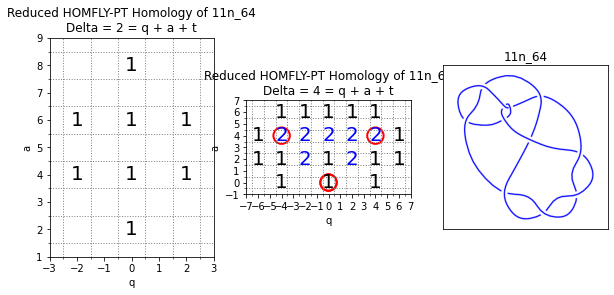

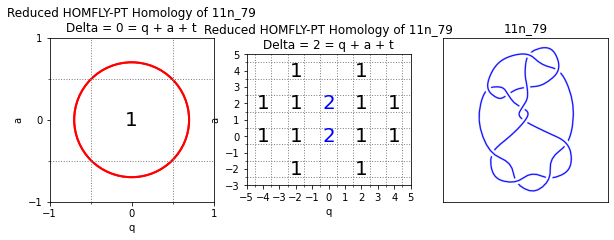

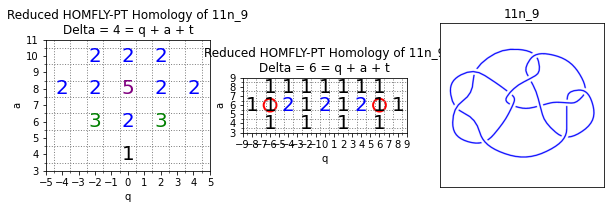

In [42]:
for knot in non_planar_knots:
    deltas = list(set([g[0]+g[1]+g[2] for g in homfly_data[knot].keys()]))
    deltas.sort()
    deltas
    lhs = max([g[1]-4 for g in homfly_data[knot] if g[0]+g[1]+g[2]==deltas[1]])
    rhs = min([g[1] for g in homfly_data[knot] if g[0]+g[1]+g[2]==deltas[0]])
    if lhs>=rhs:
        plot_homology_nonplanar(knot)